# Topic 33: Principal Component Analysis 

- 05/25/21
- onl01-dtsc-ft-022221

## Announcements:


- Phase 4 Content/Structure.
- Study Group Schedule

## Learning Objectives


- Gain an intuitive understanding of PCA and eigenvalue decomposition.
- Understand how Principal Component Analysis reduces dimensionality.


- **ACTIVITY: PCA with NHANES**
    - Compress all 1800+ features of the [National Health and Nutrition Examination Survey (NHANES)](https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey) down to <10 features.
    - Use PC features to find groups of people in 3D space.
    - Tomorrow: use clustering algorithms to statistically identify groups of people. 
- **ACTIVITY: Follow-Up Feature Selection for Predicting Parkinson's Disease**

## Resources

- Videos:
    - [PCA YouTube Playlist - With statquest and ThreeBlueOneBrown Videos](https://www.youtube.com/playlist?list=PLFknVelSJiSzgzNCV-Wvvk5R8PY2UNype) 
    
- Readings:
    - [In-Depth Article About the Curse of Dimensionality](https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)
    - [Article: Gentle Introduction to Eigenvalues and Eigenvectors for Machine Learning]( https://machinelearningmastery.com/introduction-to-eigendecomposition-eigenvalues-and-eigenvectors/)


## Questions



# Principal Component Analysis 

## PCA Overview

#### Type of Learning
- Unsupervised

#### Assumptions
- Correlation among features

#### Advantages
- Captures most of the variance in a smaller number of features

#### Disadvantages
- Number of principal components that explain most of the variance are determined by the USER

#### Requirements 

- Features must be scaled (StandardScaler)
- Sensitive to missing data.
- Sensitive to outliers.

#### Example Use
- Reducing feature space/dimensionality
- Preprocessing"
- Creating a few, informative variables from tons of data

## What is the "curse of dimensionality"?

### Reading: [In-Depth Article About the Curse of Dimensionality](https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)

<!-- 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-curse-of-dimensionality-online-ds-pt-100719/master/images/sparsity.png">

 -->



<img src="https://www.visiondummy.com/wp-content/uploads/2014/04/1Dproblem.png">

<img src="https://www.visiondummy.com/wp-content/uploads/2014/04/overfitting.png">

<img src="https://www.visiondummy.com/wp-content/uploads/2014/04/3Dproblem.png">

<img src="https://www.visiondummy.com/wp-content/uploads/2014/04/3Dproblem_separated.png">

> ...

<img src="https://www.visiondummy.com/wp-content/uploads/2014/04/sparseness.png">

## How does Principle Component Analysis solve this?

- Performs "eigendecomposition" on the covariance matrix to maximize the variance between data points.
 

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-pca-in-scikitlearn-online-ds-sp-000/master/images/inhouse_pca.png">

### Steps for Performing PCA

The theory behind PCA rests upon many foundational concepts of linear algebra. After all, PCA is re-encoding a dataset into an alternative basis (the axes). Here's the exact steps:

1. Recenter each feature of the dataset by subtracting that feature's mean from the feature vector
2. Calculate the covariance matrix for your centered dataset
3. Calculate the eigenvectors of the covariance matrix
4. Project the dataset into the new feature space: Multiply the eigenvectors by the mean centered features

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-unsupervised-learning-online-ds-pt-100719/master/images/pca.gif">

### Definitions/Vocabulary


>- **"Decomposition"**: breaking a matrix down into multiple matrices/vectors that can be combined again to produce the original matrix. 
    - There are many methods of decomposition, besides eigendecomposition. 
    - With time series we will discuss seasonal decomposition> breaking down a time series into seasonal components. 


>- **"Eigendecomposition"** will break down a matrix into 2 matrices: eigenvectors and eigenvalues.
    - **"Eigenvectors** are unit vectors, which means that their length or magnitude is equal to 1.0."*
    - **"Eigenvalues** are coefficients applied to eigenvectors that give the vectors their length or magnitude."*
  
_`*` = from: [Article: Gentle Introduction to Eigenvalues and Eigenvectors for Machine Learning]( https://machinelearningmastery.com/introduction-to-eigendecomposition-eigenvalues-and-eigenvectors/)_




>- From [Central Lecturer Notebook (updated since video recorded)](https://github.com/flatiron-school/ds-principal_component_analysis):
    - "Eigenvectors are related to eigenvalues by the following property: $\vec{x}$ is an eigenvector of the matrix $A$ if $A\vec{x} = \lambda\vec{x}$, for some eigenvalue $\lambda$."
    


- "**Principal Components**":
    - The magnitude of the eigenvalue indicates how much variance that eigenvector captures/explains. 
    - The eigenvector that has explains the most variance in the data is called the "First Principal Component" or "PC 1".
    - The eigenvector that explains the second-most variance after PC1 is PC2 or the second principal component. 
    
- By selected the top X many principal components, we can capture the most variance in the data with the fewest number of features. 

### Example Use of PCA from My Neuroscience Research Days

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_070620_FT_cohort_notes/master/images/Offline20Sorter.png">

# ACTIVITY: USING PCA TO COLLAPSE 1800+ HEALTH FEATURES TO <10

## Data - NHANES (2013-2014)

<img src="./images/nhanes.jpg">




>The [National Health and Nutrition Examination Survey (NHANES)](https://www.cdc.gov/nchs/nhanes/about_nhanes.htm) is a program of continuous studies designed to assess the health and nutritional status of adults and children in the United States. The survey examines a nationally representative sample of about 5,000 persons located across the country each year. The survey is unique in that it combines interviews and physical examinations. The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

>NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.

- *The Above was Borrowed (with Permission) from [Kristin Cooper's Phase 3 Project](https://github.com/kcoop610/phase-3-project)*


#### LINKS:
- [NHANES Dataset - Kaggle](https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey)

- [Complete variable list](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Demographics&CycleBeginYear=2013)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer,MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from ipywidgets import interact
import plotly.express as px
import plotly.io as pio
pio.templates.default='plotly_dark'

np.random.seed(321)

from sklearn.decomposition import PCA

pd.set_option('display.max_columns',0)
pd.set_option('display.max_info_rows',200)
plt.style.use('seaborn-notebook')

In [2]:
import os, sys,glob
folder = 'national-health-and-nutrition-examination-survey/'
os.listdir(folder)

['medications.csv',
 'diet.csv',
 'examination.csv',
 'demographic.csv',
 'labs.csv',
 'questionnaire.csv']

In [3]:
## Use glob to get list of csvs
files_list = glob.glob(folder+'*.csv')

In [4]:
## Load in all CSVs combined (one liner if you can...)
# Here, it's files[1:] because of an invalid start byte
df = pd.concat([pd.read_csv(file,index_col='SEQN') for file in files_list[1:]],
              axis=1)
df

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,...,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,16888.327864,12930.890649,1.0,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,...,NaN,NaN,NaN,NaN,69.0,180.0,3.0,3.0,210.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
73558,17932.143865,12684.148869,1.0,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,...,2.0,1.0,1.0,NaN,71.0,200.0,3.0,3.0,160.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
73559,59641.812930,39394.236709,1.0,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,...,NaN,NaN,NaN,NaN,70.0,195.0,3.0,2.0,195.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
73560,142203.069917,125966.366442,1.0,54.0,2.0,2.0,21.0,3.0,1.0,1.0,12.0,1.0,1.0,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1490.0,77.75,162.92,80.58,10.6,58.27,23.511,16.986,9.617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
73561,59052.357033,39004.892993,1.0,63.0,2.0,2.0,18.0,1.0,1.0,1.0,13.0,4.0,NaN,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,7.0,1421.0,55.24,178.20,87.78,12.3,55.36,4.479,26.216,1.263,...,NaN,NaN,NaN,NaN,67.0,120.0,2.0,1.0,150.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83727,14146.781331,10520.302070,1.0,59.0,2.0,2.0,8.0,7.0,1.0,1.0,13.0,1.0,1.0,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,4687.0,223.32,494.54,160.63,30.4,193.51,80.414,57.943,30.600,...,NaN,NaN,1.0,NaN,69.0,150.0,3.0,3.0,150.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,26.0,NaN,NaN,NaN
83728,38750.761193,51815.103262,1.0,25.0,2.0,2.0,9.0,5.0,1.0,2.0,3.0,4.0,NaN,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1253.0,47.55,149.20,50.73,9.3,52.39,24.459,15.965,5.387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83729,15272.505199,10401.781170,1.0,59.0,2.0,2.0,1.0,6.0,1.0,1.0,13.0,4.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,2475.0,89.37,290.37,126.54,25.7,110.30,29.372,33.540,37.623,...,NaN,NaN,NaN,NaN,64.0,195.0,1.0,2.0,185.0,NaN,1.0,10.0,NaN,

## Task: Compress 1,800+ features down to 6 using PCA. 

### First: need to explore and define our column groups


In [5]:
# Some columns are mostly null data - let's explore
nulls = df.isna().sum()/len(df)
nulls[ nulls>.99].index

Index(['DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10',
       'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DRD350JQ',
       ...
       'SMQ690F', 'SMQ830', 'SMQ840', 'SXQ550', 'SXQ841', 'WHD080I', 'WHD080K',
       'WHD080P', 'WHD080U', 'WHD080L'],
      dtype='object', length=281)

In [6]:
# Create a list of mostly null columns
high_null_cols = list(nulls[ nulls>.99].index)
len(high_null_cols)

281

In [7]:
# Now a list of the rest of columns, which should all be numeric
num_cols = df.drop(columns=high_null_cols).select_dtypes('number').columns
len(num_cols)

1499

In [8]:
# Get a list of categorical columns (that aren't mostly null)
cat_cols = df.drop(columns=high_null_cols).select_dtypes('object').columns
len(cat_cols)

31

<AxesSubplot:>

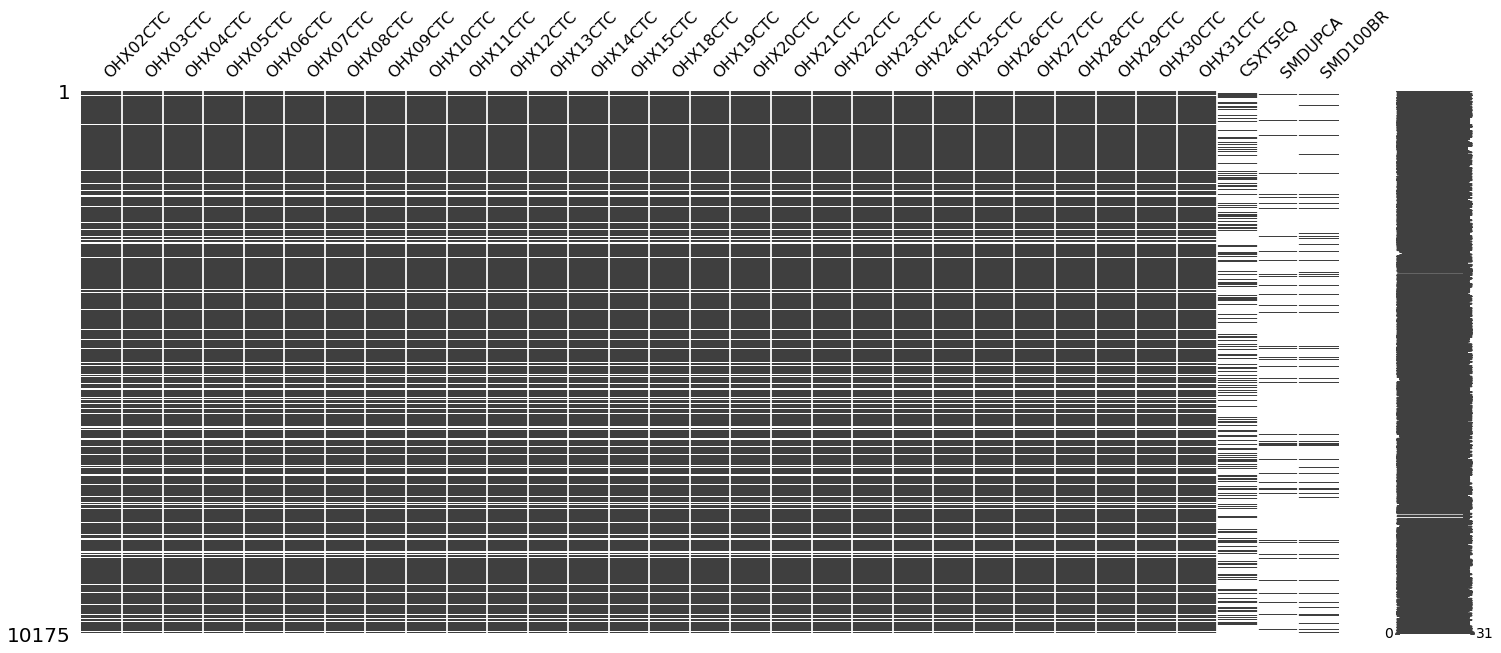

In [9]:
import missingno
missingno.matrix(df[cat_cols])

In [10]:
## Check for null values in cat cols

In [11]:
# Any of them have too many uniques to OHE?
unique_cats = df[cat_cols].nunique()
unique_cats[unique_cats>20]


SMDUPCA     208
SMD100BR    130
dtype: int64

In [12]:
## Verify we got all cols
len([*num_cols, *cat_cols, *high_null_cols]) == len(df.columns)

True

### Pipelines

In [13]:
from sklearn import set_config
set_config(display='diagram')

In [14]:
# Let's discuss - what steps am I doing? Why?
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

ohe_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))])

high_nulls_transformer = Pipeline(steps=[
    ('null_indicator', MissingIndicator())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat_ohe', ohe_transformer, cat_cols), 
        ('cat_null', high_nulls_transformer, high_null_cols)])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'WHD080S', 'WHD080T', 'WHD110', 'WHD120', 'WHD130', 'WHD140', 'WHQ150',
       'WHQ030M', 'WHQ500', 'WHQ520'],
      dtype='object',...
                                 Pipeline(steps=[('null_indicator',
                                                  MissingIndicator())]),
                                 ['DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT8',
                                  'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQSDT12',
                                  'DRQSDT91', 'DRD350JQ', 'DRD370HQ',
                                  'DRD370JQ', 'DRD370LQ', 'DRD370OQ',
                                  'DRD370PQ', 'DRD370QQ', 'DRD370SQ',
                                  'BMIRECUM', 'BMIHEAD', 'CSQ260D', 'PHAALCHR',
                                  'PHAALCMN', 'PHAANTHR', 'PHAANTMN',
                                  'PHASUPHR', 'PHASUPMN', 'LBXHCG', 'LBXEMA',
                                  'URXVOL3', 'URDFLOW3', ...])])

In [15]:
# Apply preprocessing to entire df and preview data
data = preprocessor.fit_transform(df)
data.shape

(10175, 2500)

In [16]:
# Add PCA
pca_pipe = Pipeline([
    ('prep',preprocessor),
    ('pca',PCA(n_components=6))
])
pca_pipe

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'WHD080S', 'WHD080T', 'WHD110', 'WHD120', 'WHD130', 'WHD140', 'WHQ150',
       'WHQ030M', 'WHQ500', '...
                                                  ['DRQSDT4', 'DRQSDT5',
                                                   'DRQSDT6', 'DRQSDT8',
                                                   'DRQSDT9', 'DRQSDT10',
                                                   'DRQSDT11', 'DRQSDT12',
                                                   'DRQSDT91', 'DRD350JQ',
                                                   'DRD370HQ', 'DRD370JQ',
                                                   'DRD370LQ', 'DRD370OQ',
                                                   'DRD370PQ', 'DRD370QQ',
                                                   'DRD370SQ', 'BMIRECUM',
                                                   'BMIHEAD', 'CSQ260D',
                                                   'PHAALCHR', 'PHAALCMN',
                                                   'PHAANTHR', 'PHAANTMN',
                                                   'PHASUPHR', 'PHASUPMN',
                                                   'LBXHCG', 'LBXEMA',
                                                   'URXVOL3', 'URDFLOW3', ...])])),
                ('pca', PCA(n_components=6))])

In [17]:
# Make sure to grab the step, for explained variance later
pca = pca_pipe.named_steps['pca']
pca

PCA(n_components=6)

In [18]:
# Fit transform with PCA
pc_data = pca_pipe.fit_transform(df)
print(pc_data.shape)
pc_data[:5,:]

(10175, 6)


array([[  8.46897565,  -2.56251266, -10.17926706,   3.72191471,
          1.35609847,   2.26902248],
       [ 10.25736053,  -7.22491442,   9.15609325,  -9.49612072,
         14.59424222,   2.0469033 ],
       [  5.94461946,  -3.13415882,  -1.21805996,   0.30753131,
         -1.54152279,  -4.08706998],
       [ -7.67159348,   1.18238719,  -0.46364919,   0.21297807,
          1.42209994,  -0.87872947],
       [  7.32056682,  -2.56509173,  -9.60200605,   3.04713614,
          2.92667628,  -2.95323865]])

In [19]:
pca.n_components

6

In [20]:
# Let's name these components
feature_names = [f"PC{i}" for i in range(1,pca.n_components+1)]
feature_names

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

In [21]:
# Add the column names and check out the PC data as a dataframe
df_pca = pd.DataFrame(pc_data, columns=feature_names)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,8.468976,-2.562513,-10.179267,3.721915,1.356098,2.269022
1,10.257361,-7.224914,9.156093,-9.496121,14.594242,2.046903
2,5.944619,-3.134159,-1.218060,0.307531,-1.541523,-4.087070
3,-7.671593,1.182387,-0.463649,0.212978,1.422100,-0.878729
4,7.320567,-2.565092,-9.602006,3.047136,2.926676,-2.953239
...,...,...,...,...,...,...
10170,3.250352,-4.849333,12.806002,-6.556956,8.243321,1.399958
10171,-10.121870,2.572702,-3.032300,1.689592,4.153886,-3.876723
10172,3.115188,-2.585883,3.009955,-2.104346,0.795079,-3.903564
10173,-9.198977,2.050431,-1.896888,1.043062,3.895956,-2.775120


In [22]:
# Check how much variance is explained by all of our PCs
pca.explained_variance_ratio_#.sum()

array([0.03459132, 0.02829649, 0.02134913, 0.01875246, 0.01304418,
       0.01168054])

In [23]:
pca.explained_variance_ratio_.sum()

0.12771412354753034

In [24]:
"""
How much of the total variance do these contain?


"""


'\nHow much of the total variance do these contain?\n\n\n'

### So what did we capture?

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2'), Text(0.5, 1.0, 'PC1 vs PC2')]

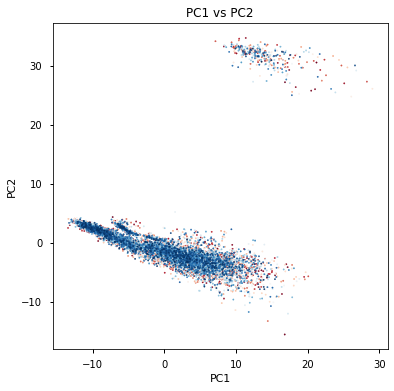

In [25]:
### Plot PC1 vs PC2
x = 'PC1'
y = 'PC2'

fig, ax = plt.subplots(figsize=(6,6))
c=sns.color_palette('RdBu', n_colors=len(df_pca))

ax.scatter(df_pca[x], 
           df_pca[y],
           c=c,s=2)

ax.set(xlabel=x,ylabel=y, title=f"{x} vs {y}")

In [26]:
def scatterplot_2D(df_pca,x,y):
    """Plotting function for interact funcs"""
    fig, ax = plt.subplots(figsize=(6,6))
    c=sns.color_palette('RdBu', n_colors=len(df_pca))
    ax.scatter(df_pca[x],df_pca[y],c=c,s=2)
    ax.set(xlabel=x,ylabel=y, title=f"{x} vs {y}")

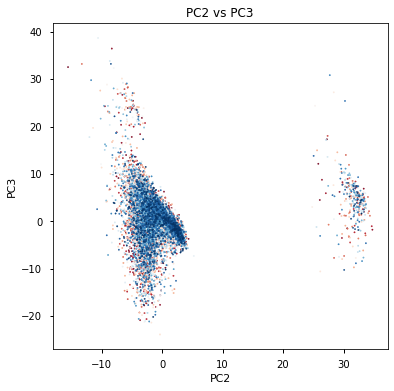

In [27]:
## plot pc2 vs pc3 with function
scatterplot_2D(df_pca,"PC2","PC3")

In [28]:
num_cols[0]

'WTDRD1'

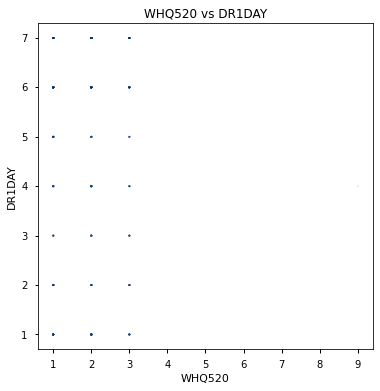

In [29]:
scatterplot_2D(df,num_cols[-1],num_cols[7])

### Make an Interactive Function for Exploring

In [30]:

@interact(x=df_pca.columns,y=df_pca.columns,)
def plot_2d_pca(x='PC1',y='PC2'):
    scatterplot_2D(df_pca,x,y)

interactive(children=(Dropdown(description='x', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'), value='PC1…

In [31]:
# Make interactive function to show any comparison
from ipywidgets import interact

@interact(x=df_pca.columns,y=df_pca.columns,)
def plot_2d_pca(x='PC1',y='PC2'):
    scatterplot_2D(df_pca,x,y)

interactive(children=(Dropdown(description='x', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'), value='PC1…

## We are only visualizing a small portion of our PC data, lets add another dimension

### Make an interactive plotly scatter3d

In [32]:
# px.scatter_3d(df_pca, x='PC1',y='PC2',z='PC3')

In [33]:
@interact(x=feature_names, y=feature_names,z=feature_names)
def plot_3D_PC(x = 'PC1', y = 'PC2',z='PC3'):

    pfig = px.scatter_3d(df_pca,x=x,y=y,z=z)
    pfig.update_traces(marker={'size':2})
    pfig.show(config = dict({'scrollZoom': False}))

interactive(children=(Dropdown(description='x', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'), value='PC1…

### What would we do with this data?

>- Notice how there are groups of datapoints that seem to form groupings/clusters in 3-dimensional space. 
    - Next class we will use K-Means clustering to identify groups of people in our PC data.
    - We will then try to explain those clusters using machine learning models.

___

# Revisiting Parkinson's Disease: Modeling with PCA

>- We previously discussed using feature selection methods to reduce the dimensionality of our Detecting Parkinson's via Speech Statistics dataset.
    - Let's test using PCA to reduce dimensionality 

## Preprocessing Parkinsons' Data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn import metrics

## Models & Utils
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from time import time

In [35]:
sys.path.append( os.path.abspath('../'))
%load_ext autoreload
%autoreload 2
import project_functions as pf

In [36]:
# ## Changing Pandas Options to see full columns in previews and info
n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
pd.set_option('display.float_format',lambda x: f"{x:.2f}")

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/master/Phase_3/phase_3_project/feature_selection/pd_speech_features.csv',
                 skiprows=1)
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_TKEO,GNE_NSR_SEO,VFER_mean,VFER_std,VFER_entropy,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,IMF_NSR_TKEO,IMF_NSR_entropy,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,mean_MFCC_5th_coef,mean_MFCC_6th_coef,mean_MFCC_7th_coef,mean_MFCC_8th_coef,mean_MFCC_9th_coef,mean_MFCC_10th_coef,mean_MFCC_11th_coef,mean_MFCC_12th_coef,mean_delta_log_energy,mean_0th_delta,mean_1st_delta,mean_2nd_delta,mean_3rd_delta,mean_4th_delta,mean_5th_delta,mean_6th_delta,mean_7th_delta,mean_8th_delta,mean_9th_delta,mean_10th_delta,mean_11th_delta,mean_12th_delta,mean_delta_delta_log_energy,mean_delta_delta_0th,mean_1st_delta_delta,mean_2nd_delta_delta,mean_3rd_delta_delta,mean_4th_delta_delta,mean_5th_delta_delta,mean_6th_delta_delta,mean_7th_delta_delta,mean_8th_delta_delta,mean_9th_delta_delta,mean_10th_delta_delta,mean_11th_delta_delta,mean_12th_delta_delta,std_Log_energy,std_MFCC_0th_coef,std_MFCC_1st_coef,std_MFCC_2nd_coef,std_MFCC_3rd_coef,std_MFCC_4th_coef,std_MFCC_5th_coef,std_MFCC_6th_coef,std_MFCC_7th_coef,std_MFCC_8th_coef,std_MFCC_9th_coef,std_MFCC_10th_coef,std_MFCC_11th_coef,std_MFCC_12th_coef,std_delta_log_energy,std_0th_delta,std_1st_delta,std_2nd_delta,std_3rd_delta,std_4th_delta,std_5th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,std_delta_delta_log_energy,std_delta_delta_0th,std_1st_delta_delta,std_2nd_delta_delta,std_3rd_delta_delta,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,Ea,Ed_1_coef,Ed_2_coef,Ed_3_coef,Ed_4_coef,Ed_5_coef,Ed_6_coef,Ed_7_coef,Ed_8_coef,Ed_9_coef,Ed_10_coef,det_entropy_shannon_1_coef,det_entropy_shannon_2_coef,det_entropy_shannon_3_coef,det_entropy_shannon_4_coef,det_entropy_shannon_5_coef,det_entropy_shannon_6_coef,det_entropy_shannon_7_coef,det_entropy_shannon_8_coef,det_entropy_shannon_9_coef,det_entropy_shannon_10_coef,det_entropy_log_1_coef,det_entropy_log_2_coef,det_entropy_log_3_coef,det_entropy_log_4_coef,det_entropy_log_5_coef,det_entropy_log_6_coef,det_entropy_log_7_coef,det_entropy_log_8_coef,det_entropy_log_9_coef,det_entropy_log_10_coef,det_TKEO_mean_1_coef,det_TKEO_mean_2_coef,det_TKEO_mean_3_coef,det_TKEO_mean_4_coef,det_TKEO_mean_5_coef,det_TKEO_mean_6_coef,det_TKEO_mean_7_coef,det_TKEO_mean_8_coef,det_TKEO_mean_9_coef,det_TKEO_mean_10_coef,det_TKEO_std_1_coef,det_TKEO_std_2_coef,det_TKEO_std_3_coef,det_TKEO_std_4_coef,det_TKEO_std_5_coef,det_TKEO_std_6_coef,det_TKEO_std_7_coef,det_TKEO_std_8_coef,det_TKEO_std_9_coef,det_TKEO_std_10_coef,app_entropy_shannon_1_coef,app_entropy_shannon_2_coef,app_entropy_shannon_3_coef,app_entropy_shannon_4_coef,app_entropy_shannon_5_coef,app_entropy_shannon_6_coef,app_entropy_shannon_7_coef,app_entropy_shannon_8_coef,app_entropy_shannon_9_coef,app_entropy_shannon_10_coef,app_entropy_log_1_coef,app_entropy_log_2_coef,app_entropy_log_3_coef,app_entropy_log_4_coef,app_entropy_log_5_coef,app_entropy_log_6_coef,app_entropy_log_7_coef,app_entropy_log_8_coef,app_entropy_log_9_coef,app_entropy_log_10_coef,app_det_TKEO_mean_1_coef,app_det_TKEO_mean_2_coef,app_det_TKEO_mean_3_coef,app_det_TKEO_mean_4_coef,app_det_TKEO_mean_5_coef,app_det_TKEO_mean_6_coef,app_det_TKEO_mean_7_coef,app_det_TKEO_mean_8_coef,app_det_TKEO_mean_9_coef,app_det_TKEO_mean_10_coef,app_TKEO_std_1_coef,app_TKEO_std_2_coef,app_TKEO_

### Train Test Split & Pipelines

In [38]:
## Specifying root names of types of features to loop through and filter out from df
target_col = 'class'
drop_cols = ['id']

## making gender a str so its caught by pipeline
df['gender'] = df['gender'].astype(str)

y = df[target_col].copy()
X = df.drop(columns=[target_col,*drop_cols]).copy()


## Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=321)

display(y_train.value_counts(),X_train.head())

1    427
0    140
Name: class, dtype: int64

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_TKEO,GNE_NSR_SEO,VFER_mean,VFER_std,VFER_entropy,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,IMF_NSR_TKEO,IMF_NSR_entropy,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,mean_MFCC_5th_coef,mean_MFCC_6th_coef,mean_MFCC_7th_coef,mean_MFCC_8th_coef,mean_MFCC_9th_coef,mean_MFCC_10th_coef,mean_MFCC_11th_coef,mean_MFCC_12th_coef,mean_delta_log_energy,mean_0th_delta,mean_1st_delta,mean_2nd_delta,mean_3rd_delta,mean_4th_delta,mean_5th_delta,mean_6th_delta,mean_7th_delta,mean_8th_delta,mean_9th_delta,mean_10th_delta,mean_11th_delta,mean_12th_delta,mean_delta_delta_log_energy,mean_delta_delta_0th,mean_1st_delta_delta,mean_2nd_delta_delta,mean_3rd_delta_delta,mean_4th_delta_delta,mean_5th_delta_delta,mean_6th_delta_delta,mean_7th_delta_delta,mean_8th_delta_delta,mean_9th_delta_delta,mean_10th_delta_delta,mean_11th_delta_delta,mean_12th_delta_delta,std_Log_energy,std_MFCC_0th_coef,std_MFCC_1st_coef,std_MFCC_2nd_coef,std_MFCC_3rd_coef,std_MFCC_4th_coef,std_MFCC_5th_coef,std_MFCC_6th_coef,std_MFCC_7th_coef,std_MFCC_8th_coef,std_MFCC_9th_coef,std_MFCC_10th_coef,std_MFCC_11th_coef,std_MFCC_12th_coef,std_delta_log_energy,std_0th_delta,std_1st_delta,std_2nd_delta,std_3rd_delta,std_4th_delta,std_5th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,std_delta_delta_log_energy,std_delta_delta_0th,std_1st_delta_delta,std_2nd_delta_delta,std_3rd_delta_delta,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,Ea,Ed_1_coef,Ed_2_coef,Ed_3_coef,Ed_4_coef,Ed_5_coef,Ed_6_coef,Ed_7_coef,Ed_8_coef,Ed_9_coef,Ed_10_coef,det_entropy_shannon_1_coef,det_entropy_shannon_2_coef,det_entropy_shannon_3_coef,det_entropy_shannon_4_coef,det_entropy_shannon_5_coef,det_entropy_shannon_6_coef,det_entropy_shannon_7_coef,det_entropy_shannon_8_coef,det_entropy_shannon_9_coef,det_entropy_shannon_10_coef,det_entropy_log_1_coef,det_entropy_log_2_coef,det_entropy_log_3_coef,det_entropy_log_4_coef,det_entropy_log_5_coef,det_entropy_log_6_coef,det_entropy_log_7_coef,det_entropy_log_8_coef,det_entropy_log_9_coef,det_entropy_log_10_coef,det_TKEO_mean_1_coef,det_TKEO_mean_2_coef,det_TKEO_mean_3_coef,det_TKEO_mean_4_coef,det_TKEO_mean_5_coef,det_TKEO_mean_6_coef,det_TKEO_mean_7_coef,det_TKEO_mean_8_coef,det_TKEO_mean_9_coef,det_TKEO_mean_10_coef,det_TKEO_std_1_coef,det_TKEO_std_2_coef,det_TKEO_std_3_coef,det_TKEO_std_4_coef,det_TKEO_std_5_coef,det_TKEO_std_6_coef,det_TKEO_std_7_coef,det_TKEO_std_8_coef,det_TKEO_std_9_coef,det_TKEO_std_10_coef,app_entropy_shannon_1_coef,app_entropy_shannon_2_coef,app_entropy_shannon_3_coef,app_entropy_shannon_4_coef,app_entropy_shannon_5_coef,app_entropy_shannon_6_coef,app_entropy_shannon_7_coef,app_entropy_shannon_8_coef,app_entropy_shannon_9_coef,app_entropy_shannon_10_coef,app_entropy_log_1_coef,app_entropy_log_2_coef,app_entropy_log_3_coef,app_entropy_log_4_coef,app_entropy_log_5_coef,app_entropy_log_6_coef,app_entropy_log_7_coef,app_entropy_log_8_coef,app_entropy_log_9_coef,app_entropy_log_10_coef,app_det_TKEO_mean_1_coef,app_det_TKEO_mean_2_coef,app_det_TKEO_mean_3_coef,app_det_TKEO_mean_4_coef,app_det_TKEO_mean_5_coef,app_det_TKEO_mean_6_coef,app_det_TKEO_mean_7_coef,app_det_TKEO_mean_8_coef,app_det_TKEO_mean_9_coef,app_det_TKEO_mean_10_coef,app_TKEO_std_1_coef,app_TKEO_std_2_coef,app_TKEO_std

In [39]:
## saving list of numeric vs categorical feature
num_cols = list(X_train.select_dtypes('number').columns)
cat_cols = list(X_train.select_dtypes('object').columns)


## create pipelines and column transformer
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder',OneHotEncoder(sparse=False,drop='if_binary'))])

print('# of num_cols:',len(num_cols))
print('# of cat_cols:',len(cat_cols))

## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessor=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])


## Fit preprocessing pipeline on training data and pull out the feature names and X_cols
preprocessor.fit(X_train)

## Use the encoder's .get_feature_names
cat_features = list(preprocessor.named_transformers_['cat'].named_steps['encoder']\
                            .get_feature_names(cat_cols))
X_cols = num_cols+cat_features

## Transform X_traian,X_test and remake dfs
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          index=X_train.index, columns=X_cols)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          index=X_test.index, columns=X_cols)

## Tranform X_train and X_test and make into DataFrames
X_train_df

# of num_cols: 752
# of cat_cols: 1


,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_TKEO,GNE_NSR_SEO,VFER_mean,VFER_std,VFER_entropy,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,IMF_NSR_TKEO,IMF_NSR_entropy,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,mean_MFCC_5th_coef,mean_MFCC_6th_coef,mean_MFCC_7th_coef,mean_MFCC_8th_coef,mean_MFCC_9th_coef,mean_MFCC_10th_coef,mean_MFCC_11th_coef,mean_MFCC_12th_coef,mean_delta_log_energy,mean_0th_delta,mean_1st_delta,mean_2nd_delta,mean_3rd_delta,mean_4th_delta,mean_5th_delta,mean_6th_delta,mean_7th_delta,mean_8th_delta,mean_9th_delta,mean_10th_delta,mean_11th_delta,mean_12th_delta,mean_delta_delta_log_energy,mean_delta_delta_0th,mean_1st_delta_delta,mean_2nd_delta_delta,mean_3rd_delta_delta,mean_4th_delta_delta,mean_5th_delta_delta,mean_6th_delta_delta,mean_7th_delta_delta,mean_8th_delta_delta,mean_9th_delta_delta,mean_10th_delta_delta,mean_11th_delta_delta,mean_12th_delta_delta,std_Log_energy,std_MFCC_0th_coef,std_MFCC_1st_coef,std_MFCC_2nd_coef,std_MFCC_3rd_coef,std_MFCC_4th_coef,std_MFCC_5th_coef,std_MFCC_6th_coef,std_MFCC_7th_coef,std_MFCC_8th_coef,std_MFCC_9th_coef,std_MFCC_10th_coef,std_MFCC_11th_coef,std_MFCC_12th_coef,std_delta_log_energy,std_0th_delta,std_1st_delta,std_2nd_delta,std_3rd_delta,std_4th_delta,std_5th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,std_delta_delta_log_energy,std_delta_delta_0th,std_1st_delta_delta,std_2nd_delta_delta,std_3rd_delta_delta,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,Ea,Ed_1_coef,Ed_2_coef,Ed_3_coef,Ed_4_coef,Ed_5_coef,Ed_6_coef,Ed_7_coef,Ed_8_coef,Ed_9_coef,Ed_10_coef,det_entropy_shannon_1_coef,det_entropy_shannon_2_coef,det_entropy_shannon_3_coef,det_entropy_shannon_4_coef,det_entropy_shannon_5_coef,det_entropy_shannon_6_coef,det_entropy_shannon_7_coef,det_entropy_shannon_8_coef,det_entropy_shannon_9_coef,det_entropy_shannon_10_coef,det_entropy_log_1_coef,det_entropy_log_2_coef,det_entropy_log_3_coef,det_entropy_log_4_coef,det_entropy_log_5_coef,det_entropy_log_6_coef,det_entropy_log_7_coef,det_entropy_log_8_coef,det_entropy_log_9_coef,det_entropy_log_10_coef,det_TKEO_mean_1_coef,det_TKEO_mean_2_coef,det_TKEO_mean_3_coef,det_TKEO_mean_4_coef,det_TKEO_mean_5_coef,det_TKEO_mean_6_coef,det_TKEO_mean_7_coef,det_TKEO_mean_8_coef,det_TKEO_mean_9_coef,det_TKEO_mean_10_coef,det_TKEO_std_1_coef,det_TKEO_std_2_coef,det_TKEO_std_3_coef,det_TKEO_std_4_coef,det_TKEO_std_5_coef,det_TKEO_std_6_coef,det_TKEO_std_7_coef,det_TKEO_std_8_coef,det_TKEO_std_9_coef,det_TKEO_std_10_coef,app_entropy_shannon_1_coef,app_entropy_shannon_2_coef,app_entropy_shannon_3_coef,app_entropy_shannon_4_coef,app_entropy_shannon_5_coef,app_entropy_shannon_6_coef,app_entropy_shannon_7_coef,app_entropy_shannon_8_coef,app_entropy_shannon_9_coef,app_entropy_shannon_10_coef,app_entropy_log_1_coef,app_entropy_log_2_coef,app_entropy_log_3_coef,app_entropy_log_4_coef,app_entropy_log_5_coef,app_entropy_log_6_coef,app_entropy_log_7_coef,app_entropy_log_8_coef,app_entropy_log_9_coef,app_entropy_log_10_coef,app_det_TKEO_mean_1_coef,app_det_TKEO_mean_2_coef,app_det_TKEO_mean_3_coef,app_det_TKEO_mean_4_coef,app_det_TKEO_mean_5_coef,app_det_TKEO_mean_6_coef,app_det_TKEO_mean_7_coef,app_det_TKEO_mean_8_coef,app_det_TKEO_mean_9_coef,app_det_TKEO_mean_10_coef,app_TKEO_std_1_coef,app_TKEO_std_2_coef,app_TKEO_std_3_coef

### Resample Data

In [40]:
## Save list of trues and falses for each cols
smote_feats = [False]*len(num_cols) +[True]*len(cat_features)
## resample training data
smote = SMOTENC(smote_feats)
X_train_sm,y_train_sm = smote.fit_resample(X_train_df,y_train)
y_train_sm.value_counts()

1    427
0    427
Name: class, dtype: int64

### Saving `train_test_list` &  `train_test_list_sm`

In [41]:
## saving train_test_list and train_test_list_sm
train_test_list = [X_train_df,y_train,X_test_df,y_test]
train_test_list_sm = [X_train_sm,y_train_sm,X_test_df,y_test]

## Baseline Model with Original Features

[i] Training started at 05/25/21-17:29:48:
	Training time was 0.6324 seconds.

           Train  Test  Difference
accuracy   1.00  0.80        0.20 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.44      0.55        52
           1       0.82      0.93      0.87       137

    accuracy                           0.80       189
   macro avg       0.77      0.69      0.71       189
weighted avg       0.79      0.80      0.78       189



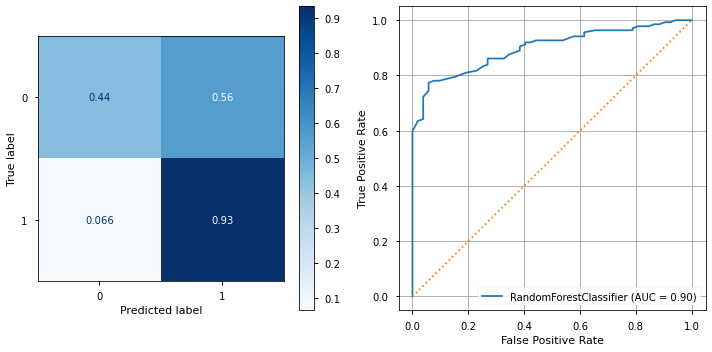

RandomForestClassifier(class_weight='balanced')

In [42]:
# Baseline linear RF  original features
rf = RandomForestClassifier(class_weight='balanced')
pf.fit_and_time_model(rf,*train_test_list)

[i] Training started at 05/25/21-17:29:49:
	Training time was 1.0213 seconds.

           Train  Test  Difference
accuracy   1.00  0.86        0.14 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        52
           1       0.90      0.91      0.91       137

    accuracy                           0.86       189
   macro avg       0.83      0.82      0.83       189
weighted avg       0.86      0.86      0.86       189



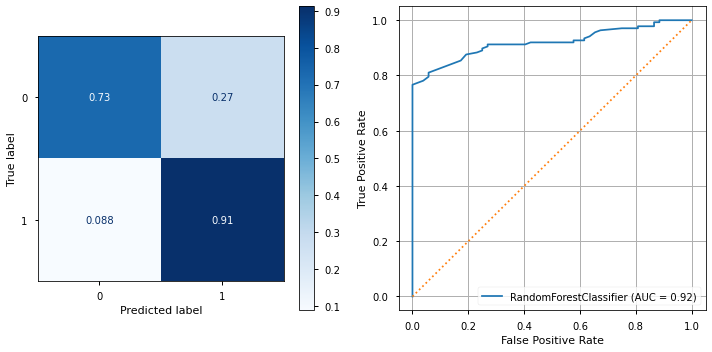

RandomForestClassifier()

In [43]:
# Baseline RF  original features - smote
rf_sm = RandomForestClassifier()
pf.fit_and_time_model(rf_sm,*train_test_list_sm)

## Apply PCA to reduce dimensionality

In [44]:
## Setting which version of data is used for PCA
USE_RESAMPELD = False

if USE_RESAMPELD:
    X_tr,y_tr,X_te,y_te = train_test_list_sm
    print('Using resampled data for PCA')
else:
    X_tr,y_tr,X_te,y_te = train_test_list
    print('Using imbalanced data for PCA')


Using imbalanced data for PCA


In [45]:
## collapse 753 columns down to 10
pca = PCA(n_components=10)
pca_cols =[f"PC{n+1}" for n in range(pca.n_components)]

X_train_pca = pd.DataFrame( pca.fit_transform(X_tr), 
                           columns=pca_cols,index=X_tr.index)

X_test_pca = pd.DataFrame(pca.transform(X_te),columns=pca_cols,index=X_te.index)

X_train_pca.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
48,-8.04,-2.48,1.50,0.22,3.52,-3.48,-0.28,-1.01,-3.02,1.50
166,13.54,-12.89,-11.41,2.34,3.67,4.75,-0.65,-7.85,2.93,-7.72
101,3.63,10.03,-4.04,3.26,-4.08,-0.91,1.69,-3.19,2.34,0.77


### Saving `train_test_list_pca`

In [46]:
## save train_test_list_pca
train_test_list_pca = [X_train_pca,y_tr,X_test_pca,y_te]

## Modeling with PC Features

[i] Training started at 05/25/21-17:29:51:
	Training time was 0.2138 seconds.

           Train  Test  Difference
accuracy   1.00  0.83        0.17 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.52      0.62        52
           1       0.84      0.94      0.89       137

    accuracy                           0.83       189
   macro avg       0.80      0.73      0.75       189
weighted avg       0.82      0.83      0.81       189



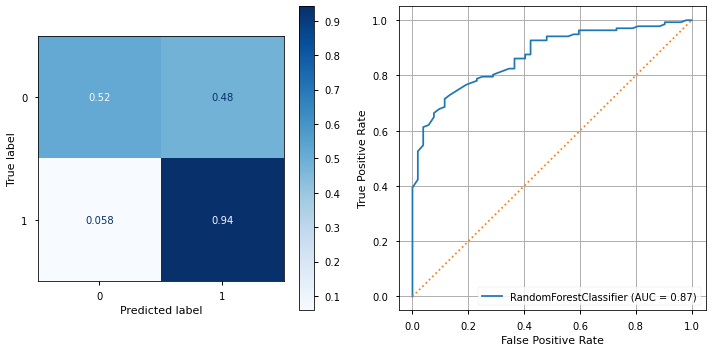

RandomForestClassifier()

In [47]:
rf_pca = RandomForestClassifier()#class_weight='balanced')
pf.fit_and_time_model(rf_pca,*train_test_list_pca)
# pf.get_importance(rf_pca, X_test_pca)

## Finding Ideal # of Compoments

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
pca_grid_pipe = Pipeline([
    ('pca',PCA(n_components=5)),
    ('clf',RandomForestClassifier(class_weight='balanced'))
])
pca_grid_pipe

Pipeline(steps=[('pca', PCA(n_components=5)),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

In [50]:
X_train_df.shape[1]//2

376

In [51]:
## Make n_components from 3 to half of total features (by 3s)
n_components_list = list(range(3,X_train_df.shape[1]//2,3))
print(len(n_components_list))
n_components_list[-1]

125


375

[i] Training started at 05/25/21-17:29:52:
Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   14.8s
[Parallel(n_jobs=8)]: Done 375 out of 375 | elapsed:   33.7s finished


	Training time was 34.1191 seconds.

           Train  Test  Difference
accuracy   1.00  0.81        0.19 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.52      0.60        52
           1       0.83      0.92      0.88       137

    accuracy                           0.81       189
   macro avg       0.77      0.72      0.74       189
weighted avg       0.80      0.81      0.80       189



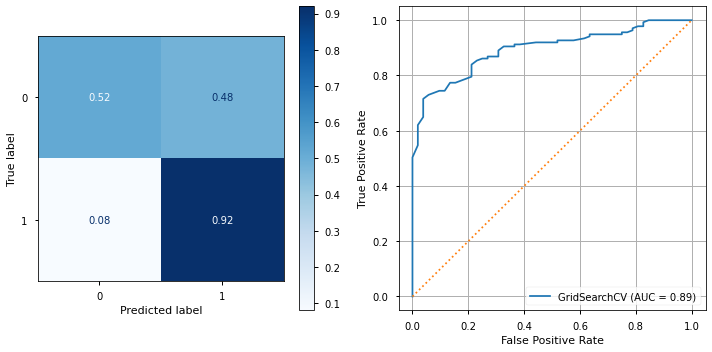

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(n_components=5)),
                                       ('clf',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=8,
             param_grid={'pca__n_components': [3, 6, 9, 12, 15, 18, 21, 24, 27,
                                               30, 33, 36, 39, 42, 45, 48, 51,
                                               54, 57, 60, 63, 66, 69, 72, 75,
                                               78, 81, 84, 87, 90, ...]},
             scoring='f1_macro', verbose=1)

In [52]:
## define params grid for search
params = {'pca__n_components': n_components_list }#,
#          'pca__svd_solver':['full', 'arpack', 'randomized']}

gridsearch = GridSearchCV(pca_grid_pipe, params,
                          scoring='f1_macro',verbose=1,cv=3, n_jobs=8)
## fit pca with train_test_list/sm
pf.fit_and_time_model(gridsearch,*train_test_list)


In [53]:
gridsearch.best_params_

{'pca__n_components': 18}

[i] Training started at 05/25/21-17:30:26:
	Training time was 0.3576 seconds.

           Train  Test  Difference
accuracy   1.00  0.83        0.17 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.69      0.69        52
           1       0.88      0.88      0.88       137

    accuracy                           0.83       189
   macro avg       0.78      0.78      0.78       189
weighted avg       0.83      0.83      0.83       189



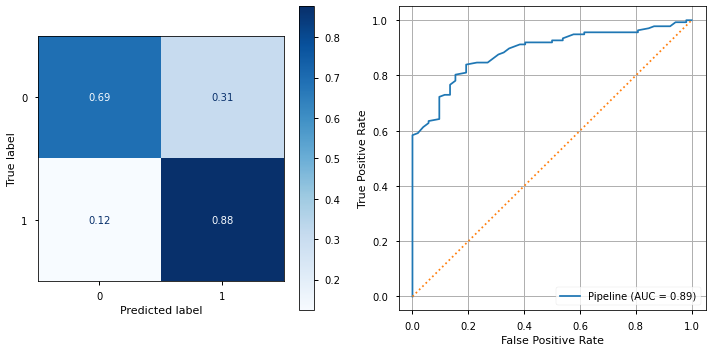

Pipeline(steps=[('pca', PCA(n_components=18)),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

In [54]:
## Get the best pca pipeline from the gridsearch and evaluate
best_pipe = gridsearch.best_estimator_
pf.fit_and_time_model(best_pipe,*train_test_list_sm )

## Making Final Dataset & Model with Best `n_components` 

In [55]:
## save best n_components 
best_n = gridsearch.best_params_['pca__n_components']
best_n

18

In [56]:
## Make a final X_train_pca and X_test_pca
pca = PCA(n_components=best_n)#best_pipe.named_steps['pca']

## collapse 753 columns down to 6
pca_cols =[f"PC{n+1}" for n in range(pca.n_components)]

X_train_pca = pd.DataFrame( pca.fit_transform(X_train_df), 
                           columns=pca_cols,index=X_train_df.index)

X_test_pca = pd.DataFrame(pca.transform(X_test_df),columns=pca_cols,index=X_test_df.index)

X_train_pca.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
48,-8.04,-2.48,1.50,0.22,3.52,-3.48,-0.28,-1.01,-3.02,1.50,-0.49,-3.45,-2.99,-1.41,1.20,-1.62,-2.46,-1.64
166,13.54,-12.89,-11.41,2.34,3.67,4.75,-0.65,-7.85,2.93,-7.72,4.48,1.29,4.36,-0.08,-4.85,-7.00,0.26,-2.16
101,3.63,10.03,-4.04,3.26,-4.08,-0.91,1.69,-3.19,2.33,0.77,0.17,-0.29,-1.60,-0.26,0.24,-0.94,-0.65,0.75


In [57]:
X_train_df.shape

(567, 753)

In [58]:
pca.inverse_transform(X_train_pca).shape

(567, 753)

In [59]:
## save train_test_list_pca
train_test_list_pca_final = [X_train_pca,y_train,X_test_pca,y_test]

[i] Training started at 05/25/21-17:30:28:
	Training time was 0.2575 seconds.

           Train  Test  Difference
accuracy   1.00  0.80        0.20 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.46      0.56        52
           1       0.82      0.93      0.87       137

    accuracy                           0.80       189
   macro avg       0.77      0.70      0.72       189
weighted avg       0.79      0.80      0.79       189



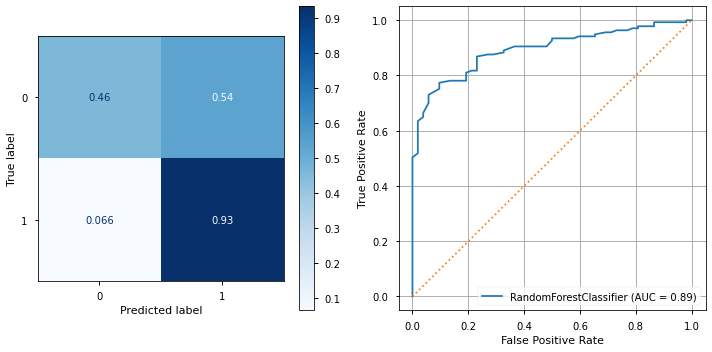

RandomForestClassifier(class_weight='balanced')

In [60]:
rf_pca = RandomForestClassifier(class_weight='balanced')
pf.fit_and_time_model(rf_pca,*train_test_list_pca_final)
# pf.get_importance(rf_pca, X_test_pca)

### Identify Important Features

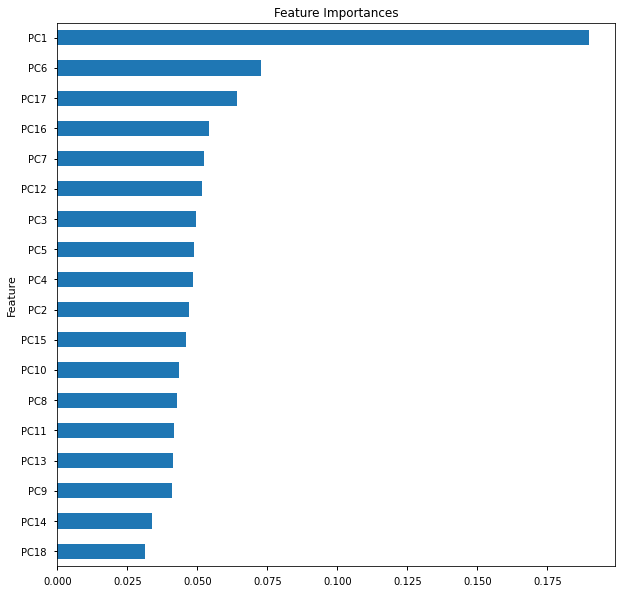

In [61]:
## Get IMportances
rf_importances = pf.get_importance(rf_pca,X_train_pca);
rf_important_features = rf_importances.sort_values(ascending=False).index.to_list()

<AxesSubplot:>

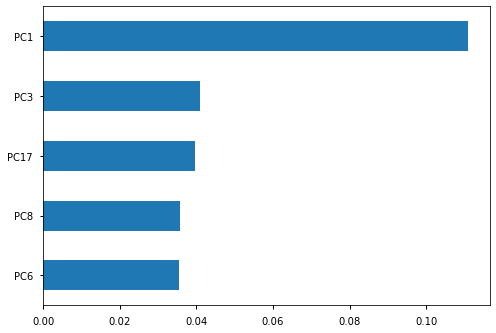

In [62]:
## Calculate permutation importance
from sklearn.inspection import permutation_importance

r = permutation_importance(rf_pca,X_test_pca,y_test,n_repeats=30,scoring='recall_macro')

## Make a series
perm_importance = pd.Series(r['importances_mean'],index=X_test_pca.columns,
                           name = 'permutation importance').sort_values(ascending=True)
perm_importance.tail(5).plot(kind='barh')

In [63]:
## get list of features in order
perm_important_features = perm_importance.sort_values(ascending=False).index.to_list()
perm_important_features[:5]

['PC1', 'PC3', 'PC17', 'PC8', 'PC6']

## Visualizing Parkinsons PCs

In [64]:
## combine the X and y data as df_pca for visual
df_pca = pd.concat([X_train_pca,y_train],axis=1)
df_pca.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,class
48,-8.04,-2.48,1.50,0.22,3.52,-3.48,-0.28,-1.01,-3.02,1.50,-0.49,-3.45,-2.99,-1.41,1.20,-1.62,-2.46,-1.64,1
166,13.54,-12.89,-11.41,2.34,3.67,4.75,-0.65,-7.85,2.93,-7.72,4.48,1.29,4.36,-0.08,-4.85,-7.00,0.26,-2.16,1


In [65]:
## Select sorting of PCs for visualization


# features = list(X_train_pca.columns)
# features = perm_importance_features
features = rf_important_features

In [66]:
@interact(x=features, y=features,z=features)
def plot_3D_PC(x = features[0],
               y = features[1],
               z = features[2]):
    ### Plot PC1 vs PC2
    df_pca['class'] = df_pca['class'].astype(str)
    pfig = px.scatter_3d(df_pca,x=x,y=y,z=z,color='class')
    pfig.update_traces(marker={'size':2})
    pfig.show(config = dict({'scrollZoom': False}))

interactive(children=(Dropdown(description='x', options=('PC1', 'PC6', 'PC17', 'PC16', 'PC7', 'PC12', 'PC3', '…

### Summary

- PCA is a dimensionality reduction technique that we can apply to our modeling process. 
    - PCA makes it difficult to interpret/understand which features are important.